<a href="https://colab.research.google.com/github/lynn-e/ml-guide/blob/master/5_3_%EB%B9%84%EC%9A%A9_%EC%B5%9C%EC%86%8C%ED%99%94%ED%95%98%EA%B8%B0_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95(Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.3 Gradient Descent

### 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

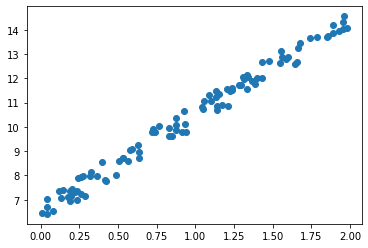

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

# x, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

### w0과 w1의 값을 최소화할 수 있도록 업데이트 수행하는 함수 생성

In [ ]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))
  
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
  
  return w1_update, w0_update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  
  # 인자로 주어진 iters 만큼 반복적으로 get_wegith_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

### 예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.490
Gradient Descent Total Cost: 0.0775


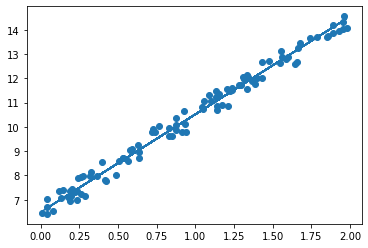

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1: ", round(w1[0, 0], 3), "w0: ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.031 w0:  6.486
stochastic Gradient Descent Total Cost:0.0777
